<a href="https://colab.research.google.com/github/shuchimishra/Tensorflow_projects/blob/main/Tensorflow_Code/Timeseries/Tabular_playground_Multi_VariateTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Description
For this challenge, you will be predicting a full year worth of sales for 4 items from two competing stores located in six different countries. This dataset is completely fictional, but contains many effects you see in real-world data, e.g., weekend and holiday effect, seasonality, etc. You are given the challenging task of predicting book sales during the year 2021.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Helper Function

In [2]:
# Auxiliary plotting function
def plot_series(x, y, format="-", start=0, end=None, title=None, xlabel=None, ylabel=None, legend=None ):
    plt.figure(figsize=(10, 6))
    if type(y) is tuple:
        for y_curr in y:
            plt.plot(x[start:end], y_curr[start:end], format)
    else:
        plt.plot(x[start:end], y[start:end], format)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend:
        plt.legend(legend)
    plt.title(title)
    plt.grid(True)
    plt.show()

# [Optional] Copy data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir data
!cp '/content/drive/MyDrive/Data Science & Machine Learning/Tensorflow Certification/Repository/Tensorflow_projects/Data/Tabular Playground Series/train.csv' './data/'
!cp '/content/drive/MyDrive/Data Science & Machine Learning/Tensorflow Certification/Repository/Tensorflow_projects/Data/Tabular Playground Series/test.csv' './data/'

# Data Insights

 Download Data Set: https://www.kaggle.com/competitions/tabular-playground-series-sep-2022/data

In [5]:
datafile_train = "./data/train.csv"
train_df = pd.read_csv(datafile_train, sep=',', index_col='row_id', parse_dates=["date"])
datafile_test = "./data/test.csv"
test_df = pd.read_csv(datafile_test, sep=',', index_col='row_id', parse_dates=["date"])

In [6]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70128 entries, 0 to 70127
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      70128 non-null  datetime64[ns]
 1   country   70128 non-null  object        
 2   store     70128 non-null  object        
 3   product   70128 non-null  object        
 4   num_sold  70128 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 17520 entries, 70128 to 87647
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     17520 non-null  datetime64[ns]
 1   country  17520 non-null  object        
 2   store    17520 non-null  object        
 3   product  17520 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 684.4+ KB


In [7]:
display(train_df.head())
display(test_df.head())

,date,country,store,product,num_sold
row_id,,,,,
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


,date,country,store,product
row_id,,,,
70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques


# [Optional] Exploratory Data Analysis

In [ ]:
print("Country information :",train_df['country'].value_counts(),'\n')
print("Store information :",train_df['store'].value_counts(),'\n')
print("Product information :",train_df['product'].value_counts(),'\n')

Country information : country
Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: count, dtype: int64 

Store information : store
KaggleMart    35064
KaggleRama    35064
Name: count, dtype: int64 

Product information : product
Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: count, dtype: int64 



In [ ]:
#View aggregated data for products sold across countries in different stories

train_df.groupby(["country","store","product"])["num_sold"].count()

country  store       product                         
Belgium  KaggleMart  Kaggle Advanced Techniques          1461
                     Kaggle Getting Started              1461
                     Kaggle Recipe Book                  1461
                     Kaggle for Kids: One Smart Goose    1461
         KaggleRama  Kaggle Advanced Techniques          1461
                     Kaggle Getting Started              1461
                     Kaggle Recipe Book                  1461
                     Kaggle for Kids: One Smart Goose    1461
France   KaggleMart  Kaggle Advanced Techniques          1461
                     Kaggle Getting Started              1461
                     Kaggle Recipe Book                  1461
                     Kaggle for Kids: One Smart Goose    1461
         KaggleRama  Kaggle Advanced Techniques          1461
                     Kaggle Getting Started              1461
                     Kaggle Recipe Book                  1461
                

In [ ]:
print("Train - Earliest date:", train_df["date"].min())
print("Train - Latest date:", train_df["date"].max())

print("Test - Earliest date:", test_df["date"].min())
print("Test - Latest date:", test_df["date"].max())

Train - Earliest date: 2017-01-01 00:00:00
Train - Latest date: 2020-12-31 00:00:00
Test - Earliest date: 2021-01-01 00:00:00
Test - Latest date: 2021-12-31 00:00:00


We have 4 years of data from 2017-01-01 to 2020-12-31 to train occurring at daily frequency.
We are required to forecast 1 year of data, from 2021-01-01 to 2021-12-31

# Data Transformation

## Pivot data

In [8]:
train_df['combined'] = train_df['country'] + '_' + train_df['store'] + '_' + train_df['product']

In [9]:
train_df.drop(['country','store','product'],axis=1)

,date,num_sold,combined
row_id,,,
0,2017-01-01,663,Belgium_KaggleMart_Kaggle Advanced Techniques
1,2017-01-01,615,Belgium_KaggleMart_Kaggle Getting Started
2,2017-01-01,480,Belgium_KaggleMart_Kaggle Recipe Book
3,2017-01-01,710,Belgium_KaggleMart_Kaggle for Kids: One Smart ...
4,2017-01-01,240,Belgium_KaggleRama_Kaggle Advanced Techniques
...,...,...,...
70123,2020-12-31,614,Spain_KaggleMart_Kaggle for Kids: One Smart Goose
70124,2020-12-31,215,Spain_KaggleRama_Kaggle Advanced Techniques
70125,2020-12-31,158,Spain_KaggleRama_Kaggle Getting Started


In [10]:
train_df = train_df.groupby(['combined', 'date'])['num_sold'].sum().unstack('combined')

In [11]:
train_df.head()

combined,Belgium_KaggleMart_Kaggle Advanced Techniques,Belgium_KaggleMart_Kaggle Getting Started,Belgium_KaggleMart_Kaggle Recipe Book,Belgium_KaggleMart_Kaggle for Kids: One Smart Goose,Belgium_KaggleRama_Kaggle Advanced Techniques,Belgium_KaggleRama_Kaggle Getting Started,Belgium_KaggleRama_Kaggle Recipe Book,Belgium_KaggleRama_Kaggle for Kids: One Smart Goose,France_KaggleMart_Kaggle Advanced Techniques,France_KaggleMart_Kaggle Getting Started,...,Poland_KaggleRama_Kaggle Recipe Book,Poland_KaggleRama_Kaggle for Kids: One Smart Goose,Spain_KaggleMart_Kaggle Advanced Techniques,Spain_KaggleMart_Kaggle Getting Started,Spain_KaggleMart_Kaggle Recipe Book,Spain_KaggleMart_Kaggle for Kids: One Smart Goose,Spain_KaggleRama_Kaggle Advanced Techniques,Spain_KaggleRama_Kaggle Getting Started,Spain_KaggleRama_Kaggle Recipe Book,Spain_KaggleRama_Kaggle for Kids: One Smart Goose
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,663,615,480,710,240,187,158,267,610,463,...,50,92,447,364,313,451,159,123,113,181
2017-01-02,514,408,342,601,187,158,119,196,455,364,...,40,67,339,266,236,379,124,104,74,123
2017-01-03,549,425,334,515,172,131,120,188,465,362,...,35,61,320,271,211,335,113,87,69,125
2017-01-04,477,384,328,517,177,134,115,169,465,311,...,35,55,302,260,201,316,114,84,74,110
2017-01-05,447,371,268,480,150,129,101,169,385,323,...,32,53,285,248,184,271,99,72,67,104


In [12]:
# Save the CSV file
train_df.to_csv('./data/train_df.csv')

<Axes: xlabel='date'>

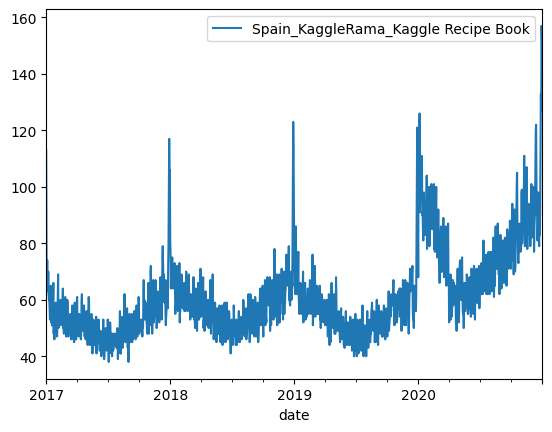

In [13]:
# Plotting some example series
train_df.plot(y='Spain_KaggleRama_Kaggle Recipe Book')

In [14]:
train_df = train_df.reset_index().set_index('date')

In [15]:
train_df.head()

combined,Belgium_KaggleMart_Kaggle Advanced Techniques,Belgium_KaggleMart_Kaggle Getting Started,Belgium_KaggleMart_Kaggle Recipe Book,Belgium_KaggleMart_Kaggle for Kids: One Smart Goose,Belgium_KaggleRama_Kaggle Advanced Techniques,Belgium_KaggleRama_Kaggle Getting Started,Belgium_KaggleRama_Kaggle Recipe Book,Belgium_KaggleRama_Kaggle for Kids: One Smart Goose,France_KaggleMart_Kaggle Advanced Techniques,France_KaggleMart_Kaggle Getting Started,...,Poland_KaggleRama_Kaggle Recipe Book,Poland_KaggleRama_Kaggle for Kids: One Smart Goose,Spain_KaggleMart_Kaggle Advanced Techniques,Spain_KaggleMart_Kaggle Getting Started,Spain_KaggleMart_Kaggle Recipe Book,Spain_KaggleMart_Kaggle for Kids: One Smart Goose,Spain_KaggleRama_Kaggle Advanced Techniques,Spain_KaggleRama_Kaggle Getting Started,Spain_KaggleRama_Kaggle Recipe Book,Spain_KaggleRama_Kaggle for Kids: One Smart Goose
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,663,615,480,710,240,187,158,267,610,463,...,50,92,447,364,313,451,159,123,113,181
2017-01-02,514,408,342,601,187,158,119,196,455,364,...,40,67,339,266,236,379,124,104,74,123
2017-01-03,549,425,334,515,172,131,120,188,465,362,...,35,61,320,271,211,335,113,87,69,125
2017-01-04,477,384,328,517,177,134,115,169,465,311,...,35,55,302,260,201,316,114,84,74,110
2017-01-05,447,371,268,480,150,129,101,169,385,323,...,32,53,285,248,184,271,99,72,67,104


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2017-01-01 to 2020-12-31
Data columns (total 48 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   Belgium_KaggleMart_Kaggle Advanced Techniques        1461 non-null   int64
 1   Belgium_KaggleMart_Kaggle Getting Started            1461 non-null   int64
 2   Belgium_KaggleMart_Kaggle Recipe Book                1461 non-null   int64
 3   Belgium_KaggleMart_Kaggle for Kids: One Smart Goose  1461 non-null   int64
 4   Belgium_KaggleRama_Kaggle Advanced Techniques        1461 non-null   int64
 5   Belgium_KaggleRama_Kaggle Getting Started            1461 non-null   int64
 6   Belgium_KaggleRama_Kaggle Recipe Book                1461 non-null   int64
 7   Belgium_KaggleRama_Kaggle for Kids: One Smart Goose  1461 non-null   int64
 8   France_KaggleMart_Kaggle Advanced Techniques         1461 non-null   i

# Data Normalization

In [17]:
data = np.array(train_df)

In [18]:
data = (data - data.mean()) / data.std()

# Training - Validation Split

In [19]:
# Number of features in the dataset. We use all features as predictors to predict all features of future time steps.
num_features = len(train_df.columns)

# Splits the data into training and validation sets.
SPLIT_TIME = int(len(data) * 0.8)
series_train = data[:SPLIT_TIME]
series_val = data[SPLIT_TIME:]

## [Optional] - Data Distribution plot (after normalization)

(1168,) (1168, 48)


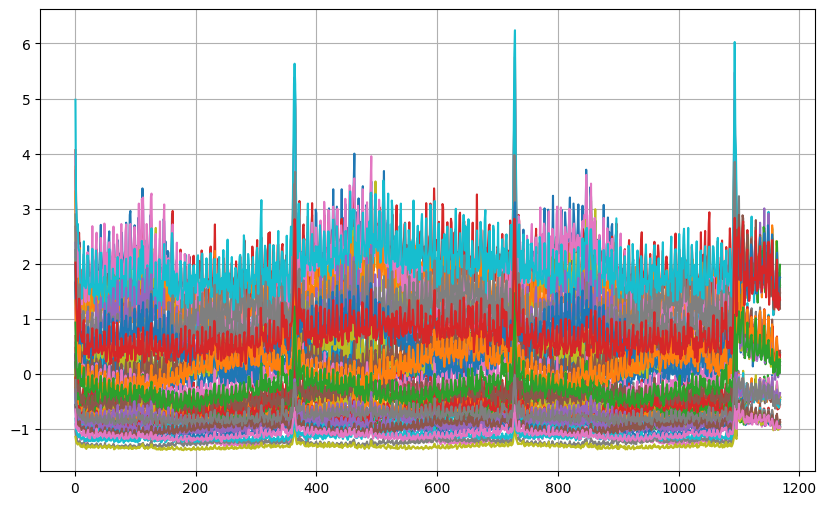

In [21]:
# Plotting the Train set
time_train = np.array([x for x in range(1, SPLIT_TIME+1)])
print(time_train.shape, series_train.shape)
plot_series(time_train, series_train, xlabel='', ylabel='')

(293,) (293, 48)


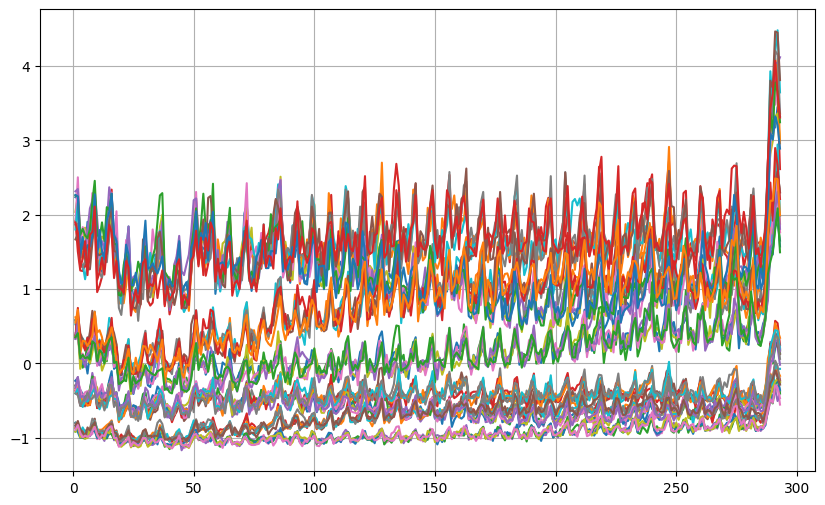

In [22]:
# Plotting the Val/Dev set
time_valid = np.array([x for x in range(1, len(data) - SPLIT_TIME+1)])
print(time_valid.shape, series_val.shape)
plot_series(time_valid, series_val, xlabel='', ylabel='')

# Global Parameters

In [23]:
# Hyper-Parameters
BATCH_SIZE = 32 # Batch size
N_PAST = 10 # Number of past time steps based on which future observations should be predicted
N_FUTURE = 10 # Number of future time steps which are to be predicted.
SHIFT = 1 # By how many positions the window slides to create a new window of observations.

# Batching of dataset

In [24]:

# This is multi step prediction.
# window size = n_past + n_future
# n_past --> no. of previous observations used to make forecast
# n_future --> horizon for which we make forecast

def windowed_dataset(series, batch_size, n_past=10, n_future=10, shift=1):

    # Generate a TF Dataset from the series values
    ds = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    ds = ds.window(size=n_past + n_future, shift=shift, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    ds = ds.flat_map(lambda w: w.batch(n_past + n_future))

    # Create tuples with features and labels
    ds = ds.map(lambda w: (w[:n_past], w[n_past:])) #(window[:-1], window[-1])

    # Create batches of windows
    dataset = ds.batch(batch_size).prefetch(1)

    return dataset

In [25]:
# Windowed train and validation datasets.
train_set = windowed_dataset(series_train, BATCH_SIZE, N_PAST, N_FUTURE, SHIFT)
valid_set = windowed_dataset(series_val, BATCH_SIZE, N_PAST, N_FUTURE, SHIFT)

In [26]:
# Print the data shape
for window in train_set.take(1):
    print(f'Shape of feature: {window[0].shape}')
    print(f'Shape of label: {window[1].shape}')

Shape of feature: (32, 10, 48)
Shape of label: (32, 10, 48)


# Build Model

In [27]:
# Code to define your model.
inputs = tf.keras.layers.Input(shape=[N_PAST, num_features])
# x = normalizer(inputs)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(inputs)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)
#tf.keras.layers.Dropout(0.2),
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32))(x)
#tf.keras.layers.Dropout(0.2),
x = tf.keras.layers.Dense(num_features* N_FUTURE)(x)
outputs = tf.keras.layers.Reshape([N_FUTURE, num_features])(x)

model = tf.keras.Model(inputs,outputs)

# Input Shape
config = model.get_config() # Returns pretty much every information about your model
print('Input Shape:', config["layers"][0]["config"]["batch_input_shape"]) # returns a tuple of width, height and channels

# Model Summary
model.summary()

Input Shape: (None, 10, 48)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 48)]          0         
                                                                 
 bidirectional (Bidirection  (None, 10, 256)           181248    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 10, 128)           164352    
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 480)               31200     
                                 

## Tune the Learning Rate

As usual, you will want to pick an optimal learning rate.

In [28]:
#Get initial weights
init_weights = model.get_weights()

In [29]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10**(epoch/20))

# Initialize the optimizer
optimizer=tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer)

# Train the model
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
36/36 [==============================] - 7s 36ms/step - loss: 0.4287 - lr: 0.0010
Epoch 2/100
36/36 [==============================] - 2s 53ms/step - loss: 0.4270 - lr: 0.0011
Epoch 3/100
36/36 [==============================] - 2s 49ms/step - loss: 0.4251 - lr: 0.0013
Epoch 4/100
36/36 [==============================] - 1s 36ms/step - loss: 0.4231 - lr: 0.0014
Epoch 5/100
36/36 [==============================] - 1s 36ms/step - loss: 0.4208 - lr: 0.0016
Epoch 6/100
36/36 [==============================] - 1s 36ms/step - loss: 0.4182 - lr: 0.0018
Epoch 7/100
36/36 [==============================] - 1s 36ms/step - loss: 0.4153 - lr: 0.0020
Epoch 8/100
36/36 [==============================] - 3s 77ms/step - loss: 0.4119 - lr: 0.0022
Epoch 9/100
36/36 [==============================] - 1s 37ms/step - loss: 0.4079 - lr: 0.0025
Epoch 10/100
36/36 [==============================] - 1s 36ms/step - loss: 0.4032 - lr: 0.0028
Epoch 11/100
36/36 [==============================] - 1s 36

(1e-08, 0.001, 0.0, 0.5)

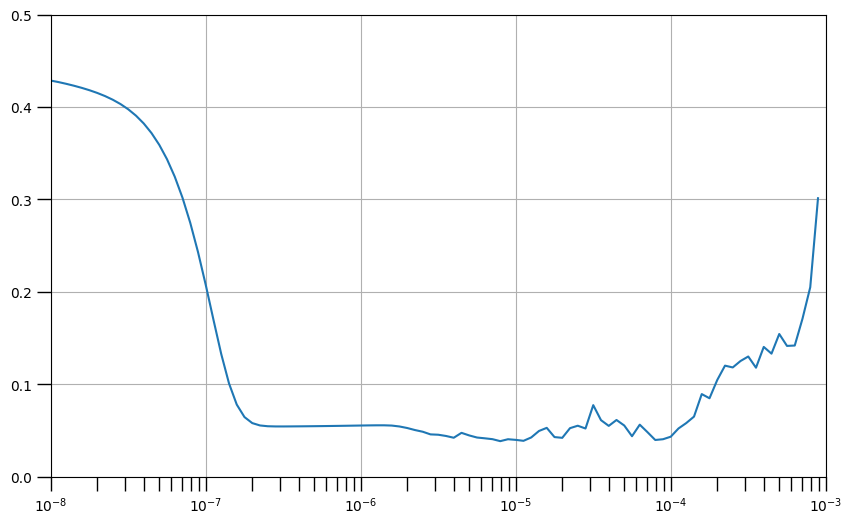

In [32]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 0.5])

## Train the Model Completely(for longer epoch)

Now you can proceed to reset and train the model. It is set for 100 epochs in the cell below but feel free to increase it if you want. Laurence got his results in the lectures after 500.

In [33]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

In [35]:
# Initialize learning rate
lr = 2e-6

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9, learning_rate=lr)


# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=['mae','mse'])

#callback
ES = tf.keras.callbacks.EarlyStopping(
    monitor="val_mae",
    patience=5,
    verbose=2,
    mode="auto",
    start_from_epoch=10
)

# Train the model
history = model.fit(train_set, epochs=500, validation_data=valid_set, verbose = 2, callbacks=[ES])

Epoch 1/500
36/36 - 10s - loss: 0.4291 - mae: 0.8375 - mse: 0.9990 - val_loss: 0.4204 - val_mae: 0.8284 - val_mse: 0.9472 - 10s/epoch - 286ms/step
Epoch 2/500
36/36 - 2s - loss: 0.4291 - mae: 0.8375 - mse: 0.9990 - val_loss: 0.4204 - val_mae: 0.8284 - val_mse: 0.9472 - 2s/epoch - 58ms/step
Epoch 3/500
36/36 - 1s - loss: 0.4291 - mae: 0.8375 - mse: 0.9990 - val_loss: 0.4204 - val_mae: 0.8284 - val_mse: 0.9472 - 1s/epoch - 38ms/step
Epoch 4/500
36/36 - 1s - loss: 0.4291 - mae: 0.8375 - mse: 0.9990 - val_loss: 0.4204 - val_mae: 0.8284 - val_mse: 0.9472 - 1s/epoch - 39ms/step
Epoch 5/500
36/36 - 1s - loss: 0.4291 - mae: 0.8375 - mse: 0.9990 - val_loss: 0.4204 - val_mae: 0.8284 - val_mse: 0.9472 - 1s/epoch - 38ms/step
Epoch 6/500
36/36 - 1s - loss: 0.4291 - mae: 0.8375 - mse: 0.9990 - val_loss: 0.4204 - val_mae: 0.8283 - val_mse: 0.9472 - 1s/epoch - 39ms/step
Epoch 7/500
36/36 - 1s - loss: 0.4291 - mae: 0.8375 - mse: 0.9990 - val_loss: 0.4204 - val_mae: 0.8283 - val_mse: 0.9472 - 1s/epoch -

## Visualize the model

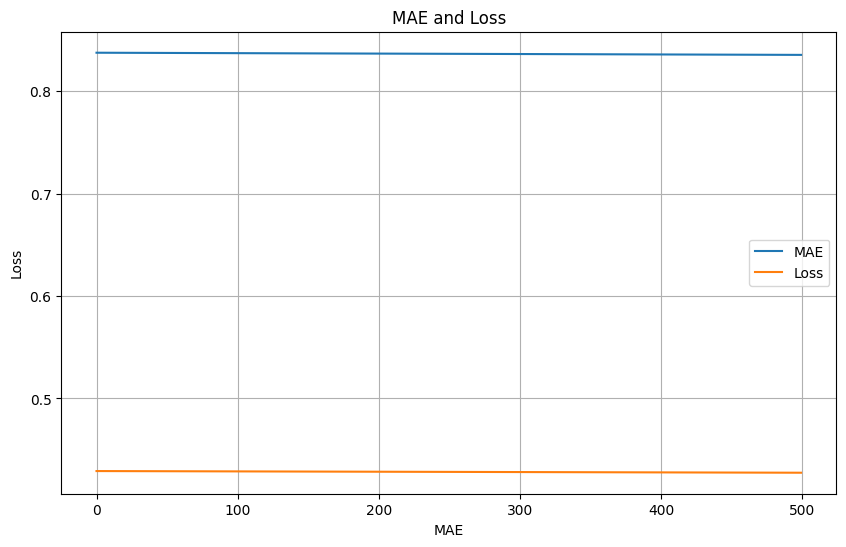

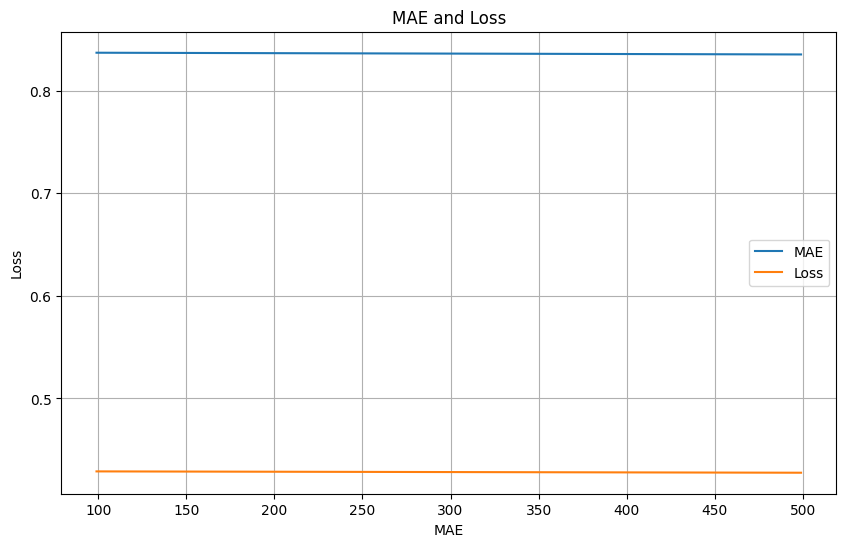

In [36]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss))


# Plot mae and loss
plot_series(
    x=epochs,
    y=(mae, loss),
    title='MAE and Loss',
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# print(int(epochs[-1]*0.2))
# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    x=epochs_zoom,
    y=(mae_zoom, loss_zoom),
    title='MAE and Loss',
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Forcasting

In [37]:
def model_forecast(model, series, window_size, batch_size):

    # Generate a TF Dataset from the series values
    ds = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    ds = ds.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    ds = ds.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    ds = ds.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(ds)

    return forecast

In [38]:
# First Prediction
forecast = model_forecast(model, data, N_PAST, BATCH_SIZE)
print('Output shape:', forecast[0].shape)
print('First prediction: \n', forecast[0])

46/46 [==============================] - 3s 13ms/step
Output shape: (10, 48)
First prediction: 
 [[-1.38173355e-02 -4.80045862e-02 -5.77886924e-02  6.15600422e-02
   6.15178384e-02 -8.50044540e-04 -3.41482810e-05  7.56938802e-03
  -5.90711720e-02 -2.91737691e-02 -5.99129945e-02 -3.33397165e-02
   1.98744088e-02  5.45985997e-02 -6.31191954e-02 -7.14594359e-03
  -2.55584419e-02  5.85354632e-04  1.82447508e-02  3.76199409e-02
  -1.73721053e-02  8.67958739e-03 -5.23531400e-02 -5.62024079e-02
   6.54650107e-03  4.73951921e-03 -5.28544225e-02 -6.21233657e-02
  -7.55895823e-02 -2.26657130e-02  4.34148759e-02 -2.20063515e-02
  -2.41646338e-02  4.17436063e-02  3.82588827e-03 -2.06964016e-02
   3.51883024e-02  2.59592179e-02 -6.72872290e-02 -1.99945122e-02
   3.01802307e-02  3.95807289e-02  1.29741207e-02 -6.77116737e-02
  -7.76257645e-03  6.93413150e-03  8.22478607e-02 -4.17538136e-02]
 [-6.74919412e-02 -7.02651357e-03 -5.25193103e-02 -3.08276191e-02
   2.07396038e-03  1.10581098e-03  8.2846945

In [50]:
# PASS THE NORMALIZED data IN THE FOLLOWING CODE
# forecast = model_forecast(model, data, N_PAST, BATCH_SIZE)
# sliced_forecast = forecast[SPLIT_TIME - N_PAST:-1, 0, :]
sliced_forecast = forecast[SPLIT_TIME - N_PAST:-1, 0, :]
print(np.array(sliced_forecast).shape)


(293, 48)


In [51]:
print(sliced_forecast[1])

[-9.6749132e-03 -8.8367283e-02 -1.1258882e-01  5.9752520e-02
  8.3057908e-03  1.0902176e-03 -2.2451248e-02  2.6757410e-02
 -6.8714179e-02 -5.3941932e-02 -3.7008043e-02 -2.5937447e-02
  1.4034478e-05  5.1419724e-02 -8.4387578e-02 -2.8798686e-02
  5.2384757e-02 -3.3024810e-02  4.2491190e-02  2.4565205e-02
  1.2331622e-04  2.4209695e-02 -2.0341105e-03 -4.2799909e-02
 -8.0349278e-03 -4.0424999e-02 -6.8502337e-02 -3.0202130e-02
 -6.8376631e-02 -1.5781295e-02  8.0751060e-03 -5.9359506e-02
 -6.1542414e-02  8.6341217e-02 -5.6315273e-02  2.5831616e-02
 -2.5421135e-02 -4.0529657e-02 -7.8784563e-03 -1.9575753e-03
  4.5423489e-02  3.3346072e-02  1.5535513e-03 -4.4543948e-02
  1.3678213e-02  1.3338735e-02  4.1256659e-02 -1.0515264e-02]


In [49]:
forecast[SPLIT_TIME - N_PAST:-1,0]

array([[-0.00902507, -0.08845406, -0.11403906, ...,  0.01292797,
         0.04011492, -0.00941809],
       [-0.00967491, -0.08836728, -0.11258882, ...,  0.01333874,
         0.04125666, -0.01051526],
       [-0.00997929, -0.08662489, -0.10980602, ...,  0.01253294,
         0.03993764, -0.01165627],
       ...,
       [ 0.01910559, -0.03949746, -0.08001751, ...,  0.00525255,
         0.00522645, -0.03959851],
       [ 0.02611631, -0.03397804, -0.08191772, ...,  0.00267977,
        -0.00295724, -0.03524437],
       [ 0.02728274, -0.02840593, -0.08729652, ..., -0.00037623,
        -0.00677898, -0.03375177]], dtype=float32)

In [52]:
series_val = series_val[:sliced_forecast.shape[0]]

print(sliced_forecast.shape, series_val.shape)

(293, 48) (293, 48)


In [54]:
# Compute the MAE
MAE = tf.keras.metrics.MeanAbsoluteError()
MAE.update_state(series_val[:,:], sliced_forecast[:,:])
MAE = MAE.result().numpy()
print('Validation MAE:', round(MAE, 4))

Validation MAE: 0.8359


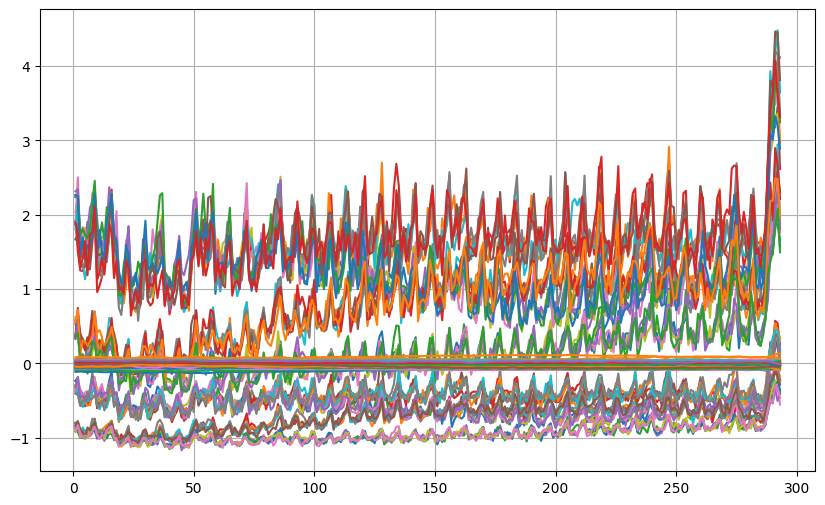

In [55]:
# Plot the results
plot_series(np.squeeze(time_valid)[:series_val.shape[0]], (series_val, sliced_forecast))

46/46 [==============================] - 3s 65ms/step
(293, 48) (293, 48)
Validation MAE: 0.8359


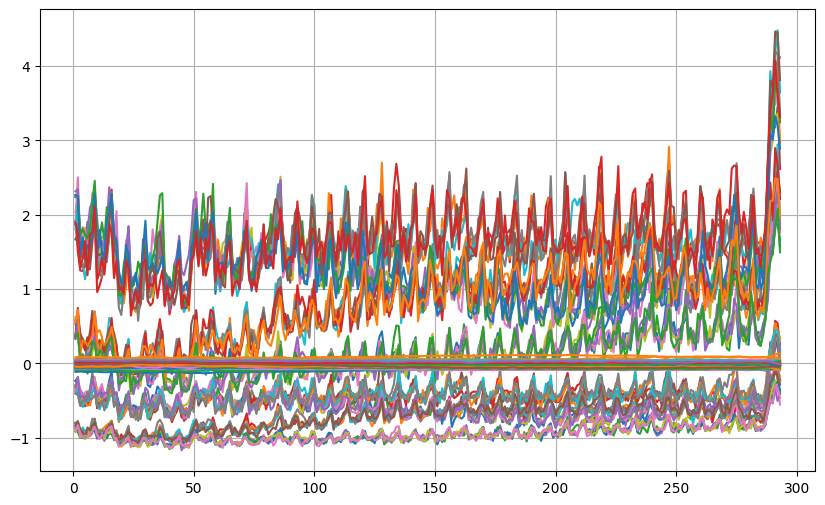

In [71]:
# PASS THE NORMALIZED data IN THE FOLLOWING CODE
forecast = model_forecast(model, data, N_PAST, BATCH_SIZE)
forecast = forecast[SPLIT_TIME - N_PAST:-1, 0, :]
series_val = series_val[:forecast.shape[0]]

print(forecast.shape, series_val.shape)

# Compute the MAE
MAE = tf.keras.metrics.MeanAbsoluteError()
MAE.update_state(series_val[:,:], forecast[:,:]) #Accumulate statistics for the metric.
MAE = MAE.result().numpy() #Compute the current metric value.
print('Validation MAE:', round(MAE, 4))

# Plot the results
plot_series(np.squeeze(time_valid)[:series_val.shape[0]], (series_val, forecast))

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Running the function will first return the overall RMSE regardless of day, then an array of RMSE scores for each day.
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):

	scores = []

	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):

		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])

		# calculate rmse
		rmse = sqrt(mse)

		# store the rmse in list
		scores.append(rmse)

	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):

			s = s + (actual[row, col] - predicted[row, col])**2
	overall_score = sqrt(s / (actual.shape[0] * actual.shape[1]))

	return overall_score, scores

In [66]:
overall_score, scores = evaluate_forecasts(series_val, forecast)
